In [ ]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


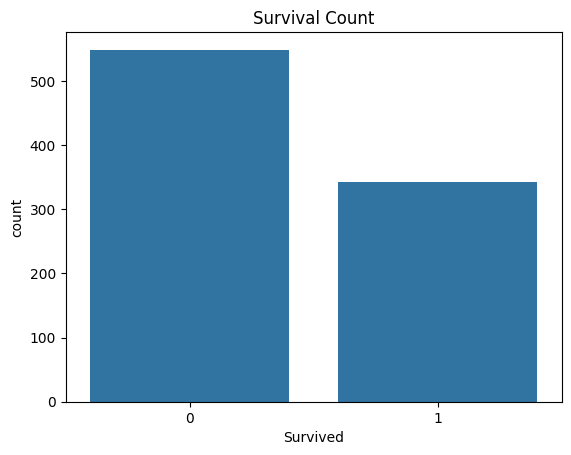

In [ ]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

**Survival Count**

Observation: Around 62% of passengers did not survive, while about 38% survived.

Insight: The dataset is imbalanced toward non-survivors.

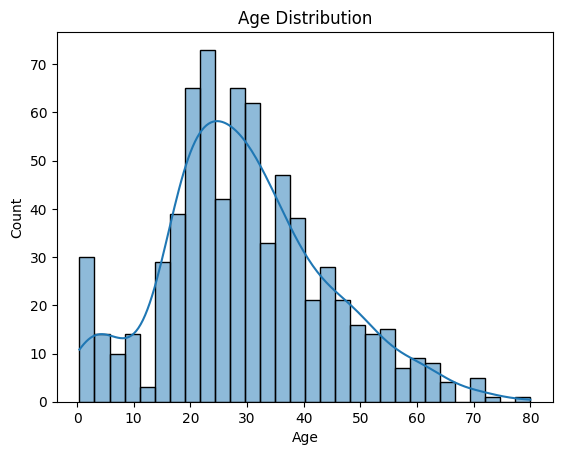

In [ ]:
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

**Age Distribution**

Observation: Most passengers were aged between 20–40 years, with a peak in the 20–30 range.

Insight: Younger adults formed the largest passenger group.

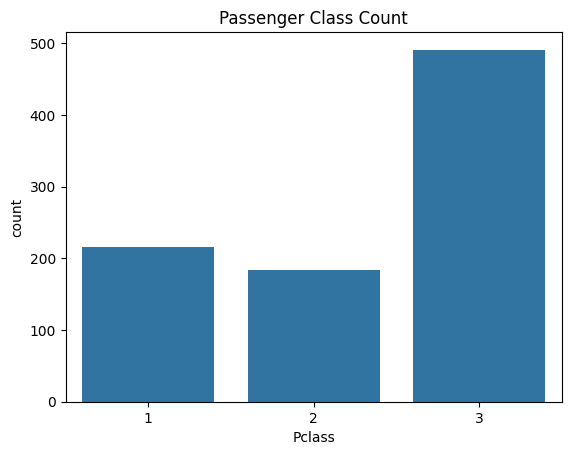

In [ ]:
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Count")
plt.show()

**Passenger Class Count**

Observation: 3rd class passengers were the largest group, followed by 1st class, then 2nd class.

Insight: Many passengers were from lower socio-economic backgrounds.

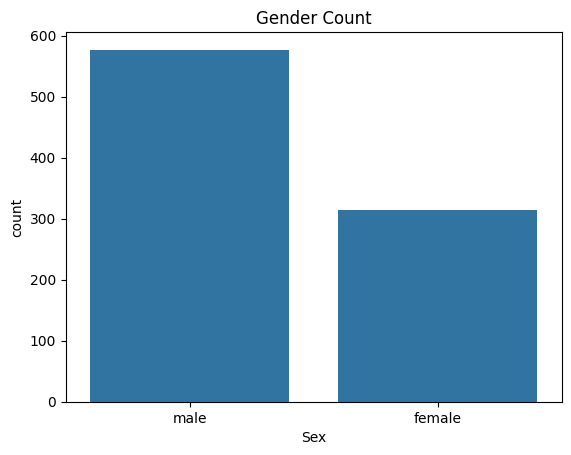

In [ ]:
sns.countplot(x='Sex', data=df)
plt.title("Gender Count")
plt.show()

**Gender Distribution**

Observation: There were more males than females on board.

Insight: Gender distribution may influence survival chances.


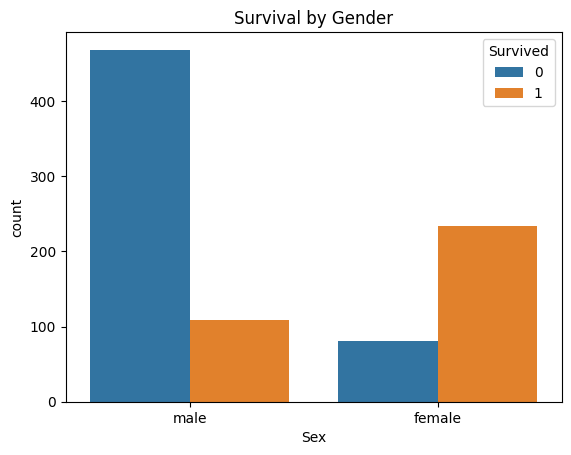

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

**Survival by Gender**

Observation: A higher percentage of females survived compared to males.

Insight: Gender played a significant role in survival probability (likely due to “women and children first” evacuation policy).

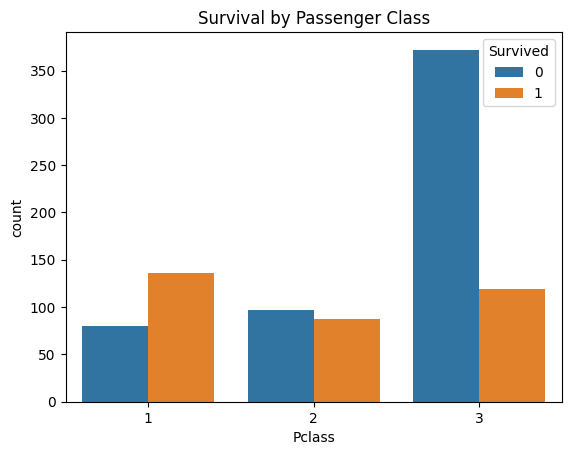

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

**Survival by Passenger Class**

Observation: 1st class passengers had the highest survival rate, followed by 2nd class, while 3rd class had the lowest.

Insight: Class strongly influenced survival chances — possibly due to better access to lifeboats.

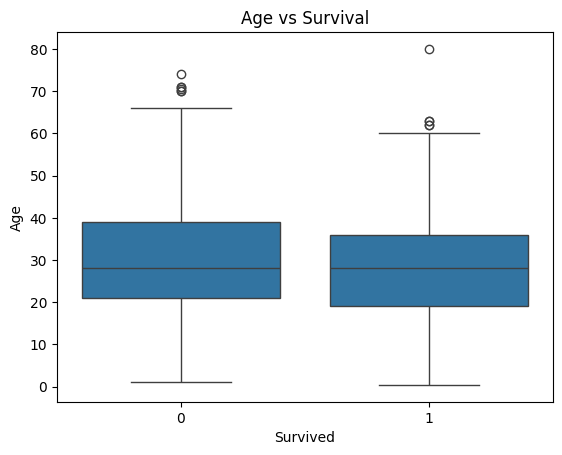

In [ ]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

**Age vs Survival (Boxplot)**

Observation: Survivors tend to have a slightly lower median age compared to non-survivors.

Insight: Younger passengers had a slight survival advantage.

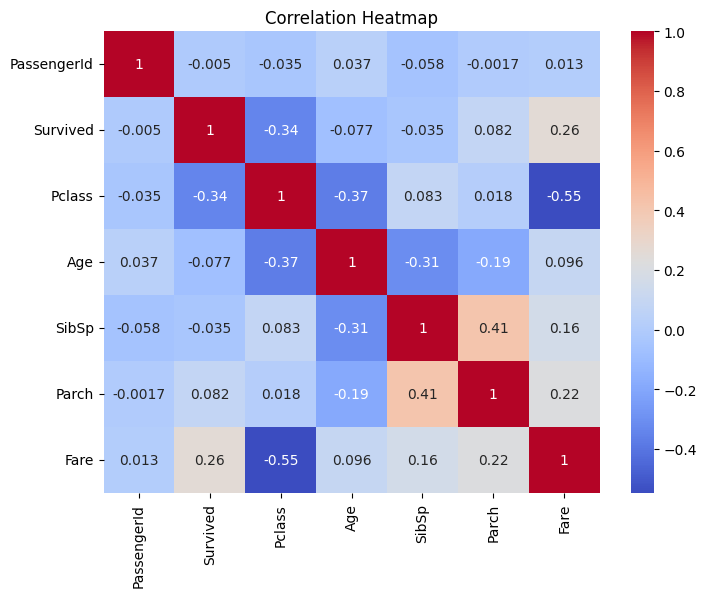

In [ ]:
plt.figure(figsize=(8,6))
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Correlation Heatmap**

Observation: Fare is positively correlated with Survived, while Pclass is negatively correlated with Survived.

Insight: Higher ticket prices (often linked to higher class) increased chances of survival.

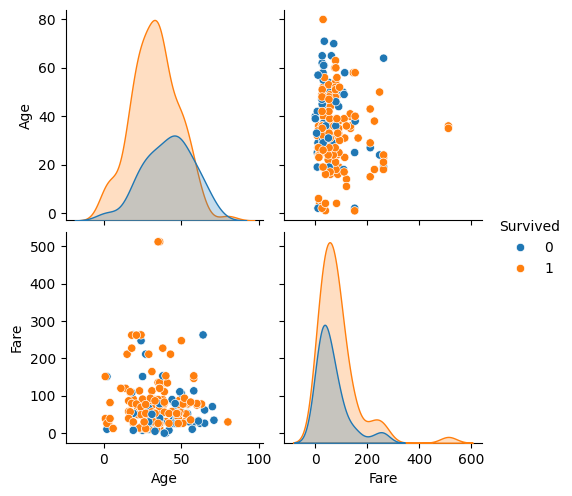

In [ ]:
sns.pairplot(df.dropna(), vars=['Age', 'Fare'], hue='Survived')
plt.show()

**Pairplot (Age & Fare)**

Observation: Survivors often paid higher fares and were more represented in younger age groups.

Insight: Socio-economic status and age combined played a role in survival.

In [ ]:
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with most frequent value (mode)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Check if missing values remain
print(df.isnull().sum())

# Display the first few rows to verify (no dtype info shown)
display(df.head())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
AgeGroup       0
HasCabin       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,≥18 years,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,≥18 years,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,≥18 years,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,≥18 years,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,≥18 years,0


### **Titanic Survival Statistics**

| **Feature**         | **Category**     | **Survival Rate (%)** | **Count**    |
|---------------------|------------------|-----------------------|--------------|
| **Overall**         | All Passengers   | **38.38%**            | 342 / 891    |
| **Gender**          | Female           | **74.20%**            | 233 / 314    |
|                     | Male             | **18.89%**            | 109 / 577    |
| **Passenger Class** | 1st Class        | **62.96%**            | 136 / 216    |
|                     | 2nd Class        | **47.28%**            | 87 / 184     |
|                     | 3rd Class        | **24.24%**            | 119 / 491    |
| **Age Group**       | <18 years        | **51.08%**            | 61 / 119     |
|                     | ≥18 years        | **36.19%**            | 281 / 772    |

---


**Conclusion:**

The EDA of the Titanic dataset, after data cleaning, reveals that survival was strongly influenced by gender, passenger class, and fare paid. Women and children had significantly higher chances of survival compared to men, and passengers in higher classes—particularly first class—were more likely to survive than those in lower classes. Higher ticket fares also correlated with better survival rates, reflecting the link between socioeconomic status and survival probability. Missing values in the Age column were filled with the median, and missing values in the Embarked column were filled with the mode, ensuring no missing data remained. Overall survival stood at approximately 38%.